In [183]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [184]:
from sklearn.datasets import load_boston
import pandas as pd

#boston = load_boston()

In [185]:

from sklearn import cluster
from sklearn.cluster import KMeans
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
   
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [186]:
#setting OS

os.chdir('/Users/ruchikasi/Documents/Personal/Springboard/')

In [187]:
df = pd.read_csv('/Users/ruchikasi/Documents/Personal/Springboard/csdf.csv')

Exploring the shape and datatypes for the airbnb singapore listings dataset

**Data Wrangling Summary**

This Dataset is a listings dataset from AirBNB Singapore. The key features are neighbourhood descriptions, host id, listing id, room type , and other specifications around availability and minimum nights.

Data Cleaning Summarry:

Initial Steps: 
Summarized the dataset using methods like info,and describe to see which columns have missing values and which columns are not required for the analysis. The overall goal of my analysis two fold.
A) to understand if there are different cohorts of neighbourhoods in Singapore for AirBNB.
b) to understand what impacts price

Variable Elimination : some of the columns like name, host_id( as analysis is done at id level) are arbitrary and removed from analysis.

Variable Transformation: For , the two object type columns  neighbourhood_group and room_type - I created nominal variables so that they can be used in the analysis.

Variable Selection :I did not remove last_review and number of reviews is kept as my hypothesis is that listings with review are higher priced than listings without review. I plan to do a t-test before eliminating these columns as possible predictors for my analysis.

Outlier : analysis was done using z value for all continous variables. all rows with all of the z values > 3 were removed. i have not removed rows using individual outlier criteria and will do it later as I try out some models.

Outlier : I removed all listings with 0 avbailability. 



In [188]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,Review_Recency,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,NaN,0.51,6,351
1,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,East Region,Bedok,Shared room,14,1,0,NaN,NaN,NaN,2,0
2,37506711,Central 1BR Apt in Foodie Haven Hipster Paradise,29799617,John,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,NaN,4.00,1,34
3,35947264,Senja cozy,75175440,Rain,West Region,Bukit Panjang,Entire home/apt,14,1,1,6/24/19,NaN,0.45,2,0
4,18679631,Small room for you,108408404,Sutthida,Central Region,Marine Parade,Private room,14,2,1,5/14/17,NaN,0.04,1,0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 15 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
Review_Recency                    0 non-null float64
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 926.7+ KB


In [190]:
df.shape

(7907, 15)

total of 7907 rows and 15 columns. next step is to find total sum of na values per columns

In [14]:
df.isna().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
Review_Recency                    7907
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

** Findings of intial review of data 
*  Name as 2 missing names but that shoul not be an issue as we will be using id as our index for most analysis.

* Drop Review_Recency as it is totally blank.

* last review has 35% missing data. But would still like to use it as a variable as it may have an impact on price.

* last review and review per month are correlated as last review data is blank for all the listings with no review. I will keep the data as is for now and may impute missing values at the time of modelling




In [191]:
df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'Review_Recency',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Now let's explore the data set itself. 

In [192]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,Review_Recency,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,NaN,0.51,6,351
1,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,East Region,Bedok,Shared room,14,1,0,NaN,NaN,NaN,2,0
2,37506711,Central 1BR Apt in Foodie Haven Hipster Paradise,29799617,John,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,NaN,4.00,1,34


In [193]:
# dropping variables which are not required.

#Fields not needed to our problem
to_drop = ["name","host_name", "Review_Recency",]
    
# Drop selected fields in place
df.drop(to_drop, inplace=True, axis=1)

In [194]:
#reviewing new dataset
df.head(3)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,114674497,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,0.51,6,351
1,18656726,21900076,East Region,Bedok,Shared room,14,1,0,NaN,NaN,2,0
2,37506711,29799617,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,4.00,1,34


In [195]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [196]:
#list of continuous variables
#list of continous columns
col = ['price','minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count']

In [197]:

#plotting box plots to discover outliers

def drawhist(col):
    for i in col:
        sns.boxplot(x = df[i])
        
        plt.xlabel(i)
        plt.show()
    return()



/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


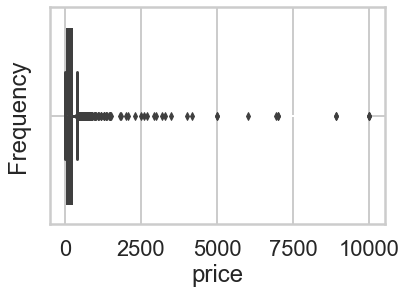

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


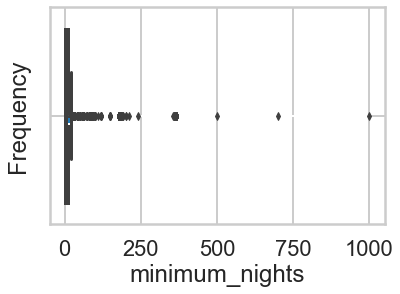

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


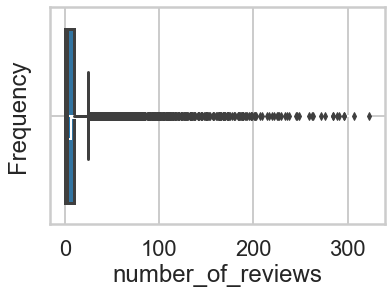

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


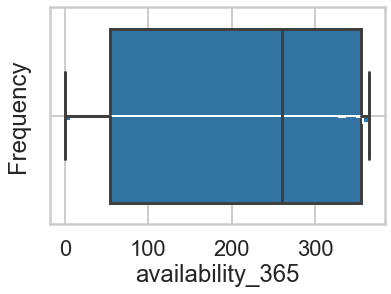

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


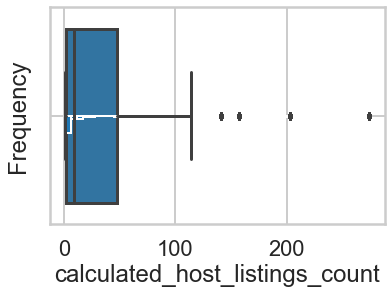

()

In [42]:
drawhist(col)

In [198]:
#using z scores to identify outliers

from scipy import stats
import numpy as np


In [94]:
#syntax : df = pd.DataFrame(data, columns = ['Name', 'Age'])


In [199]:
# writing a function to create additional columns in df for z values for each variable 
def zvalues(col):
    for i in col:
        z = pd.DataFrame(np.abs(stats.zscore(df[i])),columns = [i+" zval"])
        df[i+" zval"]= z[i+" zval"]
    return()

In [200]:
zvalues(col)

()

In [201]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval
0,21408571,114674497,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,0.51,6,351,0.497795,0.344723,0.128169,0.973738,0.531354
1,18656726,21900076,East Region,Bedok,Shared room,14,1,0,NaN,NaN,2,0,0.456639,0.392238,0.431140,1.428548,0.592769
2,37506711,29799617,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,4.00,1,34,0.456639,0.344723,0.296486,1.195848,0.608122
3,35947264,75175440,West Region,Bukit Panjang,Entire home/apt,14,1,1,6/24/19,0.45,2,0,0.456639,0.392238,0.397477,1.428548,0.592769
4,18679631,108408404,Central Region,Marine Parade,Private room,14,2,1,5/14/17,0.04,1,0,0.456639,0.368480,0.397477,1.428548,0.608122


In [202]:
# removing outliers based on 3 variables i found relevant

df_o = df[(df['price zval']<3) & (df['minimum_nights zval']<3) & (df['availability_365 zval'] <3)]

In [203]:
df_o.shape

(7699, 17)

In [204]:
df_o.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval
0,21408571,114674497,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,0.51,6,351,0.497795,0.344723,0.128169,0.973738,0.531354
1,18656726,21900076,East Region,Bedok,Shared room,14,1,0,NaN,NaN,2,0,0.456639,0.392238,0.431140,1.428548,0.592769
2,37506711,29799617,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,4.00,1,34,0.456639,0.344723,0.296486,1.195848,0.608122
3,35947264,75175440,West Region,Bukit Panjang,Entire home/apt,14,1,1,6/24/19,0.45,2,0,0.456639,0.392238,0.397477,1.428548,0.592769
4,18679631,108408404,Central Region,Marine Parade,Private room,14,2,1,5/14/17,0.04,1,0,0.456639,0.368480,0.397477,1.428548,0.608122


In [205]:
print((7907- 7699)/7907,"outliers removed")

0.02630580498292652 outliers removed


**The next set of code snippets is converting categorical variables into nominal-numerical variables after looking for missing values**

In [207]:
print(df_o.isnull().sum())

id                                        0
host_id                                   0
neighbourhood_group                       0
neighbourhood                             0
room_type                                 0
price                                     0
minimum_nights                            0
number_of_reviews                         0
last_review                            2613
reviews_per_month                      2613
calculated_host_listings_count            0
availability_365                          0
price zval                                0
minimum_nights zval                       0
number_of_reviews zval                    0
availability_365 zval                     0
calculated_host_listings_count zval       0
dtype: int64


In [208]:
# Converting last_review to datetime

df_o['last_rev'] =  pd.to_datetime(df_o['last_review'], infer_datetime_format=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
df_o.dtypes

id                                              int64
host_id                                         int64
neighbourhood_group                            object
neighbourhood                                  object
room_type                                      object
price                                           int64
minimum_nights                                  int64
number_of_reviews                               int64
last_review                                    object
reviews_per_month                             float64
calculated_host_listings_count                  int64
availability_365                                int64
price zval                                    float64
minimum_nights zval                           float64
number_of_reviews zval                        float64
availability_365 zval                         float64
calculated_host_listings_count zval           float64
last_rev                               datetime64[ns]
dtype: object

In [211]:
#using catcodes to code the variable

df_o['neighbourhood_group'] = df_o['neighbourhood_group'].astype('category')
df_o['neighbourhood'] = df_o['neighbourhood'].astype('category')
df_o['room_type'] = df_o['room_type'].astype('category')

df_o['ng'] = df_o['neighbourhood_group'].cat.codes
df_o['nb'] = df_o['neighbourhood'].cat.codes
df_o['room_t'] = df_o['room_type'].cat.codes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [212]:
df_o.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,availability_365,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval,last_rev,ng,nb,room_t
0,21408571,114674497,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,0.51,...,351,0.497795,0.344723,0.128169,0.973738,0.531354,2019-08-11,0,29,0
1,18656726,21900076,East Region,Bedok,Shared room,14,1,0,NaN,NaN,...,0,0.456639,0.392238,0.431140,1.428548,0.592769,NaT,1,1,2
2,37506711,29799617,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,4.00,...,34,0.456639,0.344723,0.296486,1.195848,0.608122,2019-08-26,0,11,0
3,35947264,75175440,West Region,Bukit Panjang,Entire home/apt,14,1,1,6/24/19,0.45,...,0,0.456639,0.392238,0.397477,1.428548,0.592769,2019-06-24,4,5,0
4,18679631,108408404,Central Region,Marine Parade,Private room,14,2,1,5/14/17,0.04,...,0,0.456639,0.368480,0.397477,1.428548,0.608122,2017-05-14,0,19,1


In [213]:
df_o.shape

(7699, 21)

In [216]:
df_o.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price zval', 'minimum_nights zval',
       'number_of_reviews zval', 'availability_365 zval',
       'calculated_host_listings_count zval', 'last_rev', 'ng', 'nb',
       'room_t'],
      dtype='object')

In [32]:
#%matplotlib inline
#changing font size of the plots
#matplotlib.rcParams.update({'font.size': 18})

*End of Captstone Data Wrangling Submission*

#### EDA CODE

In [36]:
# function to plot histograms for continuos variables

#list of continous columns
col = ['price','minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count']

def drawhist(col):
    for i in col:
        df[i].plot(kind = 'hist',bins = 50,normed = True)
        plt.xlabel(i)
        plt.show()
    return()

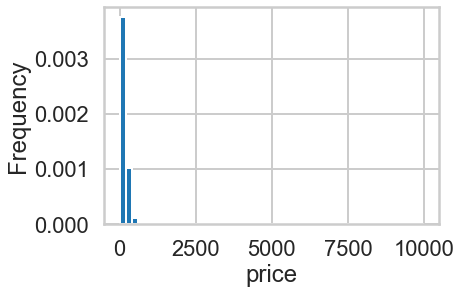

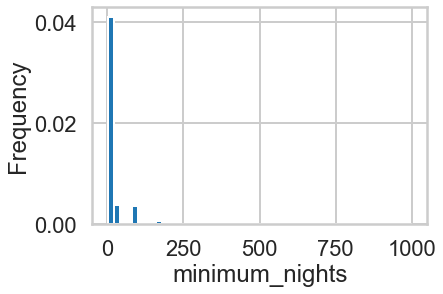

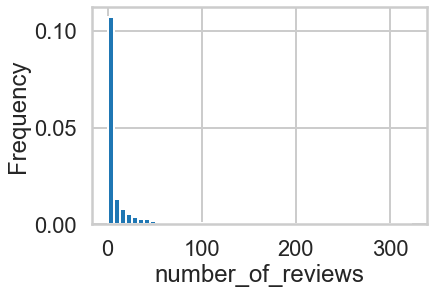

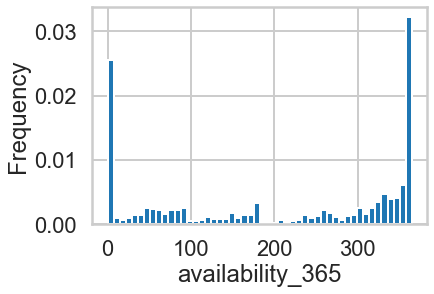

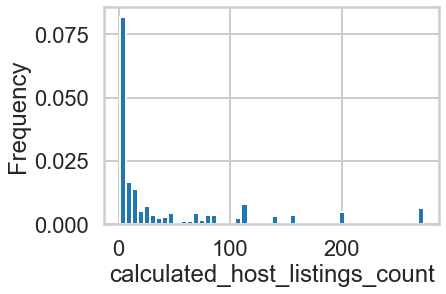

()

In [34]:
drawhist(col)

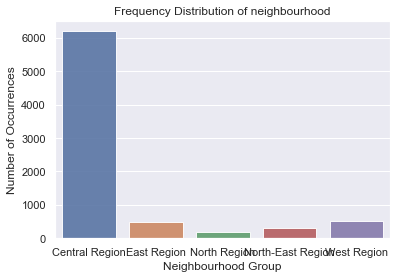

In [217]:
# cross tab for categorical variables
ng_count = df_o['neighbourhood_group'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ng_count.index, ng_count.values, alpha=0.9)
plt.title('Frequency Distribution of neighbourhood')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.show()

In [220]:
# exporting to view in tablea

df_o.to_csv("df_capst.csv",index=False)

## CAPTSTONE INFERENTIAL STATS - SECTION ##

**APPROACH**

As I reviewed the dataset and looked at some preliminary box plots and histograms, I built the following hypthesis which I wanted to validate. See below


**HYPOTHESIS 1**

34% of the listings did not have any review and NaN in last review data and reviews per month. So I wanted to test if not having reviews has a significant impact on price given all things constant. My null hypothesis : Not having reviews has no impact on the median price of the listing. I ran a t-test to find out if my null hypothesis is valid or not.
 

In [251]:
#Creating a new variable "Rev_Flag : 1 for some review , 0 for no review

df_o['rev_flag'] = np.where(df_o['reviews_per_month'] > 0, 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [253]:
df_o['rev_flag'].value_counts()

1    5086
0    2613
Name: rev_flag, dtype: int64

In [255]:
rev_0 = df_o.loc[df_o.rev_flag == 0,'price']
rev_1 = df_o.loc[df_o.rev_flag == 1,'price']

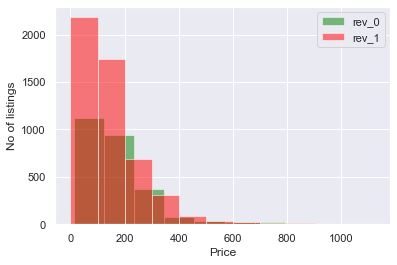

In [266]:
_ = plt.hist(rev_0, color = 'green', alpha = 0.5)
_ = plt.hist(rev_1, color = 'red', alpha = 0.5)
_ = plt.xlabel('Price')
_ = plt.ylabel('No of listings')
_ = plt.legend(['rev_0', 'rev_1'])


In [269]:
print('Mean of non review and some review listing prices are {:.2f} and {:.2f} dollars.'.format(np.median(rev_0), np.median(rev_1)))

Mean of non review and some review listing prices are 137.00 and 118.00 dollars.


The bar charts overlap but it looks like listings with reviews overindex on lower prices. But that may be a bias for occupying and reviewing lower priced listings.

In [264]:
alpha = 0.05

In [270]:
#Run two sample t test, because sample sizes are smaller now. 
t, p = stats.ttest_ind(rev_0, rev_1)
print('t = {}\tp = {}'.format(t, p))
if p < alpha:
    print('Null hypothesis rejected.')
else:
    print('Null hypothesis cannot be rejected')

t = 8.194987645288192	p = 2.911657896745438e-16
Null hypothesis rejected.


**HYPOTHESIS 1 CONCLUSION**
Both the grops seem to have signficantly different prices so I decided to not eliminate the variable

**HYPOTHESIS 2**

Before analyzing the relationship between other independent factors and price, I wanted to check for correlation amongst independent variables. Next section of code will analyse the correlation amongst independent variables.

## Building a initial linear model

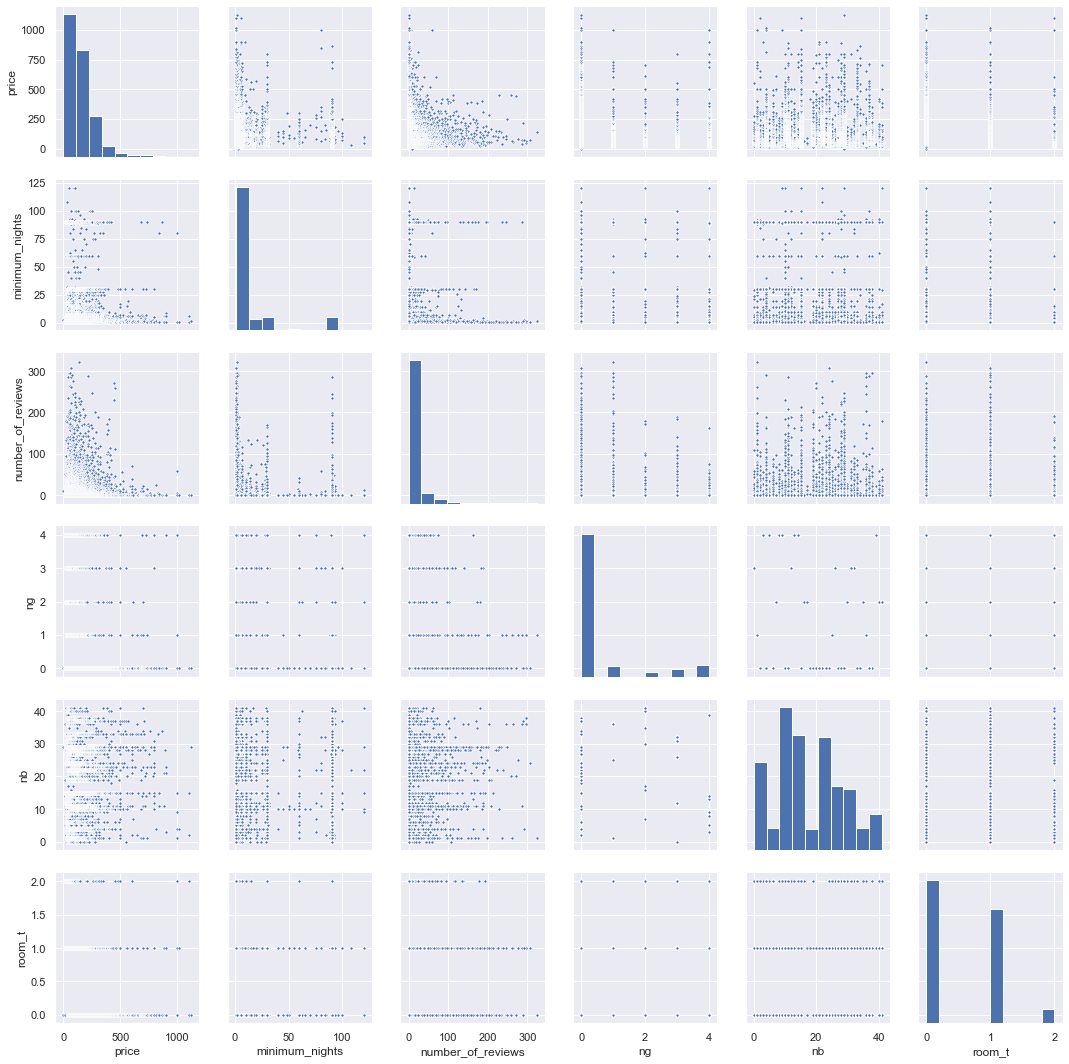

In [385]:
#building correlationplots for all variables

#Plot correlations of predictors
_ = sns.pairplot(df_o, vars = ['price', 'minimum_nights', 'number_of_reviews', 'ng','nb','room_t'], plot_kws={"s": 10})

It seems like room type and price may have a specific relationship as room 2 on visual inspection room type 2 seems to have a lower price index than other room types. to be checked if this relationship is significant.

There also seems to be a relationship between review count and price, indicating that lower priced listings get more review. but this relationship is probably because of the availability factor. 

Before doing more inferential stats tests, I will create basic model and see what it outputs and how well it predicts

**Encoding Variables**

In [379]:
from sklearn import preprocessing

In [380]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder() 

In [ ]:
# Fit label encoder

le.fit(df_o['neighbourhood_group'])
df_o['neighbourhood_group']=le.transform(df_o['neighbourhood_group'])

In [321]:
le.fit(df_o['neighbourhood'])
df_o['neighbourhood']=le.transform(df_o['neighbourhood'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [322]:
le.fit(df_o['room_type'])
df_o['room_type']=le.transform(df_o['room_type'])



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**USING SCIKIT LEARN TO BUILD A MODEL FIRST AND AND THEN WILL USE STATS MODEL**

In [388]:
# CHECKING COLUMN NAMES#df_o.columns

In [360]:
from sklearn.linear_model import LinearRegression
X = df_o.drop(['price','last_review',
               'price zval','minimum_nights zval',
               'availability_365 zval',
               'calculated_host_listings_count zval',
               'last_rev','reviews_per_month',
               'number_of_reviews zval','ng','nb','room_t',], axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [362]:
# Use all 13 predictors to fit linear regression model
a = lm.fit(X, df_o.price)

In [363]:
# your turn
lm.coef_
lm.intercept_

207.18630244005288

In [364]:
lm.coef_

array([-3.45335856e-07,  5.67190339e-08, -5.57640168e+00,  4.74077362e-01,
       -1.04579493e+02, -6.88618456e-01, -2.13685163e-01, -1.70320933e-01,
        1.46188169e-01, -2.11508094e+01])

In [511]:
lm.

array([-3.39051366e-07,  4.64162906e-08, -6.05546891e+00,  4.43749400e-01,
       -1.04954918e+02, -6.98562679e-01, -2.32389768e-01, -1.69931871e-01,
        1.46530187e-01, -2.21421381e+01])

In [389]:
# MAKING A DATAFRAME WITH THE COEFFICIENTS#
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,id,-3.390514e-07
1,host_id,4.641629e-08
2,neighbourhood_group,-6.055469e+00
3,neighbourhood,4.437494e-01
4,room_type,-1.049549e+02
5,minimum_nights,-6.985627e-01
6,number_of_reviews,-2.323898e-01
7,calculated_host_listings_count,-1.699319e-01
8,availability_365,1.465302e-01
9,rev_flag,-2.214214e+01


In [393]:
#making y dataset

y = df_o['price']

Now splitting training and testing dataset and trying the model

In [394]:
X.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rev_flag
0,21408571,114674497,0,29,0,3,9,6,351,1
1,18656726,21900076,1,1,2,1,0,2,0,0
2,37506711,29799617,0,11,0,3,4,1,34,1
3,35947264,75175440,4,5,0,1,1,2,0,1
4,18679631,108408404,0,19,1,2,1,1,0,1


In [367]:
from sklearn.model_selection import train_test_split

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [395]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [369]:
predicts = lm.predict(X_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,87,118.574412
1,75,194.013043
2,150,234.654263
3,67,66.308263
4,131,204.207539


In [370]:
print(error_airbnb)

      Actual Values  Predicted Values
0                87        118.574412
1                75        194.013043
2               150        234.654263
3                67         66.308263
4               131        204.207539
...             ...               ...
1535            450        241.614739
1536            319        230.623593
1537            292        229.466977
1538            131        224.344397
1539            144        130.100178

[1540 rows x 2 columns]


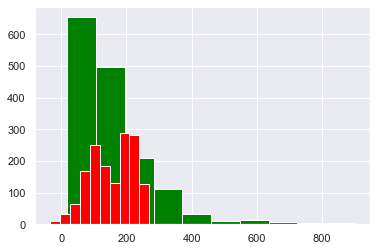

In [371]:
_ = plt.hist(y_test, color = 'green')
_ = plt.hist(predicts, color = 'red')

In [372]:
error_airbnb.to_csv("lm_error1.csv",index=False)

In [373]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predicts))

In [374]:
print(rms)

98.0376405835658


In [375]:
y_pred = predicts

In [376]:
y_true = y_test

In [548]:
#calculating mean absolute percentage error

import numpy as np

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**USING STATSMODEL TO BUILD THE SAME MODEL SO THAT I CAN READ MODEL OUTPUT EASILY**

In [326]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [382]:
X.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'rev_flag'],
      dtype='object')

In [451]:
X_train_sm, X_test_sm = train_test_split(X_sm,test_size=0.5, random_state=101)

In [454]:
# Take the reduced model from Part 3
m = ols('price ~ id+host_id+neighbourhood+neighbourhood_group+room_type+minimum_nights+number_of_reviews+rev_flag+availability_365',X_train_sm).fit()
print(m.summary())
# 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 24 Dec 2019   Prob (F-statistic):          6.10e-265
Time:                        13:04:02   Log-Likelihood:                -23443.
No. Observations:                3849   AIC:                         4.691e+04
Df Residuals:                    3839   BIC:                         4.697e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             200.2904    

In [455]:
m.predict()

array([202.63775053, 208.23551335, 114.35471686, ...,  92.20656373,
        88.65284497, 234.80351061])

In [456]:
X_test_sm.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rev_flag,price
2777,33149902,249590675,3,12,1,1,0,1,180,0,87
2307,34819352,73166292,0,11,0,2,3,1,78,1,75
4961,19936126,114674497,0,29,0,4,31,6,313,1,150
2003,5186243,4705949,1,1,1,3,71,13,74,1,67
4173,26435121,29420853,0,15,0,10,4,141,332,1,131


In [457]:
X_test_sm.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'rev_flag', 'price'],
      dtype='object')

In [459]:
X_test_sm_a = X_test_sm.drop(columns = 'price')

In [462]:
ytestpred = pd.DataFrame({'test_pred':m.predict(X_test_sm_a)})

In [463]:
ytestpred.shape

(3850, 1)

In [468]:
ytrainpred = pd.DataFrame({'train_pred':m.predict()})

In [469]:
ytrainpred.shape

(3849, 1)

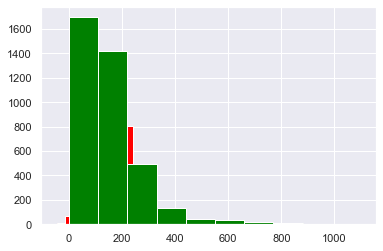

In [472]:
_ = plt.hist(ytestpred['test_pred'], color = 'red')
_ = plt.hist(X_test_sm['price'], color = 'green')

In [473]:
rms = sqrt(mean_squared_error(ytestpred.test_pred, X_test_sm.price))

In [475]:
print (rms)

100.25461362803063


In [489]:
y_true = X_test_sm['price']
y_pred = ytestpred['test_pred']

In [488]:
#MAPE
MAPE(y_true,y_pred)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


inf

Looks like the residuals are increasing as the price is going up. so will see if there are price outliers

In [498]:
#Checking for outliers on target variable
np.mean(df_o['price'])

152.7701000129887

In [580]:
np.mean(y_true)

98.17455928102316

In [581]:
np.mean(y_pred)

99.51847830149876

In [582]:
np.median(y_true)

94.0

In [583]:
np.median(y_pred)

87.81401817690295

(array([ 12.,  67., 152., 315., 692., 533., 243., 687., 801., 348.]),
 array([-46.87254071, -15.01933933,  16.83386205,  48.68706343,
         80.54026481, 112.39346619, 144.24666756, 176.09986894,
        207.95307032, 239.8062717 , 271.65947308]),
 <a list of 10 Patch objects>)

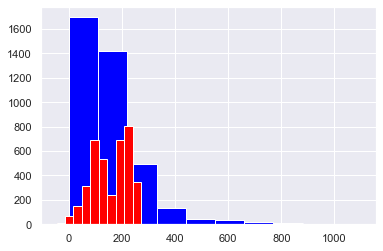

In [507]:
# on test data set
plt.hist(y_true,color = 'blue')
plt.hist(y_pred,color = 'red')

In [512]:
residual = y_true - y_pred

In [515]:
rms = sqrt(mean_squared_error(y_true, y_pred))

In [516]:
print(rms)

100.25461362803063


Text(0, 0.5, 'residual')

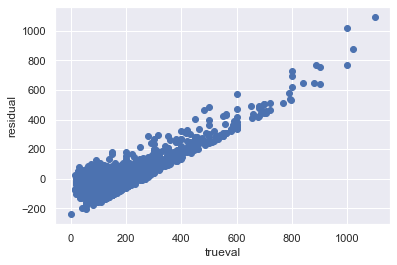

In [517]:
plt.scatter(y_true,residual)
plt.xlabel("trueval")
plt.ylabel("residual")

The model is not predicting higher error values. So trying to identify what is different abiout higher price value and checking if the model predicts better for lower price

In [529]:
#Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [530]:
X.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'rev_flag', 'price'],
      dtype='object')

In [593]:
X_sm = df_o

In [651]:
X_sm_p1 = X_sm[X_sm['price'] <= 300]

In [705]:
X_sm_p1.shape

(7063, 24)

In [706]:
X_train_sm, X_test_sm = train_test_split(X_sm_p1,test_size=0.5, random_state=101)

In [707]:
# Take the reduced model from Part 3
m = ols('price ~ id+host_id+neighbourhood+neighbourhood_group+room_type+minimum_nights+number_of_reviews+rev_flag+availability_365+ng_flag',X_train_sm).fit()
print(m.summary())
# 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     315.4
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:32:06   Log-Likelihood:                -19049.
No. Observations:                3531   AIC:                         3.812e+04
Df Residuals:                    3520   BIC:                         3.819e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             166.1073    

In [708]:
m.predict()

array([163.06154674,  55.43084804, 184.11225005, ...,  84.10684954,
        78.79780776, 187.63490155])

In [709]:
X_test_sm.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price zval', 'minimum_nights zval',
       'number_of_reviews zval', 'availability_365 zval',
       'calculated_host_listings_count zval', 'last_rev', 'ng', 'nb', 'room_t',
       'rev_flag', 'Ng_Flag', 'ng_flag'],
      dtype='object')

In [710]:
X_test_sm_a = X_test_sm.drop(columns = 'price')

In [711]:
ytestpred = pd.DataFrame({'test_pred':m.predict(X_test_sm_a)})

In [712]:
ytestpred.shape

(3532, 1)

In [713]:
ytrainpred = pd.DataFrame({'train_pred':m.predict()})

In [714]:
ytrainpred.shape

(3531, 1)

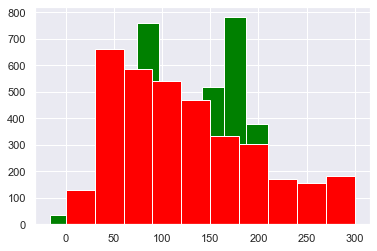

In [715]:
_ = plt.hist(ytestpred['test_pred'], color = 'green')
_ = plt.hist(X_test_sm['price'], color = 'red')

In [716]:
rms = sqrt(mean_squared_error(ytestpred.test_pred, X_test_sm.price))

In [717]:
print (rms)

54.04696949842849


In [718]:
y_true = X_test_sm['price']
y_pred = ytestpred['test_pred']

MAPE(y_true,y_pred)

In [719]:
MAPE(y_true,y_pred)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


inf

1. price < 771 (upper whisker) - rms 89
2. price < 500 ( upper hinge)  - rms 71
3. price < 300                 - rms 50       


On further data inspection, found out that 92% of datapoints < 300 dollars so proceeding with improving the model for all listings less than 300 dollars

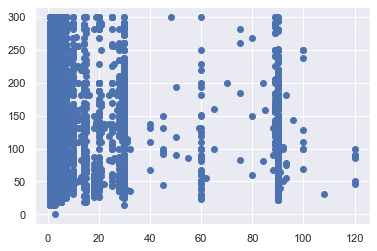

In [668]:
#analyzing the relation of other features to price for all listings less than $300

plt.scatter(X_sm_p1.minimum_nights,X_sm_p1.price)


In [669]:
X_sm_p1.describe()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval,ng,nb,room_t,rev_flag
count,7.063000e+03,7.063000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,4687.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000
mean,2.331574e+07,8.972630e+07,0.514795,17.738780,0.556562,125.888857,13.389778,13.256407,1.029358,41.753646,203.092454,0.217732,0.441917,0.568160,0.936048,0.735317,0.514795,17.738780,0.556562,0.663599
std,1.018557e+07,8.234366e+07,1.168609,10.149192,0.595598,73.137140,24.739011,30.033392,1.260478,66.281485,146.848960,0.122988,0.399625,0.836391,0.367842,0.703689,1.168609,10.149192,0.595598,0.472511
min,5.064600e+04,2.366600e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000,0.000979,0.011640,0.006484,0.001873,0.006023,0.000000,0.000000,0.000000,0.000000
25%,1.565402e+07,2.138628e+07,0.000000,11.000000,0.000000,62.000000,1.000000,0.000000,0.180000,2.000000,48.000000,0.100930,0.297208,0.330150,0.747882,0.423879,0.000000,11.000000,0.000000,0.000000
50%,2.461080e+07,6.035200e+07,0.000000,15.000000,1.000000,112.000000,3.000000,2.000000,0.550000,9.000000,251.000000,0.221459,0.368480,0.397477,1.011057,0.592769,0.000000,15.000000,1.000000,1.000000
75%,3.234057e+07,1.532258e+08,0.000000,27.000000,1.000000,169.000000,10.000000,11.000000,1.365000,48.000000,352.000000,0.328272,0.392238,0.431140,1.100030,0.608122,0.000000,27.000000,1.000000,1.000000
max,3.811276e+07,2.885676e+08,4.000000,41.000000,2.000000,300.000000,120.000000,323.000000,13.000000,274.000000,365.000000,0.497795,2.434906,10.442133,1.428548,3.583422,4.000000,41.000000,2.000000,1.000000


In [689]:
table = pd.pivot_table(X_sm_p1, values='id', index=['neighbourhood_group','room_type']
                              , aggfunc='count', fill_value=0)

In [690]:
print(table)

                                 id
neighbourhood_group room_type      
0                   0          3193
                    1          2104
                    2           341
1                   0           114
                    1           347
                    2             8
2                   0            46
                    1           121
                    2             8
3                   0            52
                    1           246
                    2             9
4                   0           108
                    1           351
                    2            15


In [691]:
table['% of Total'] = (table.id / table.id.sum() * 100)
table['% of roomtype'] = (table.id / table.groupby(level=0).id.transform(sum) * 100)
table.loc['total', :] = table.sum().values
print (table)

                                   id  % of Total  % of roomtype
neighbourhood_group room_type                                   
0                   0          3193.0   45.207419      56.633558
                    1          2104.0   29.789041      37.318198
                    2           341.0    4.827977       6.048244
1                   0           114.0    1.614045      24.307036
                    1           347.0    4.912927      73.987207
                    2             8.0    0.113266       1.705757
2                   0            46.0    0.651281      26.285714
                    1           121.0    1.713153      69.142857
                    2             8.0    0.113266       4.571429
3                   0            52.0    0.736231      16.938111
                    1           246.0    3.482939      80.130293
                    2             9.0    0.127425       2.931596
4                   0           108.0    1.529095      22.784810
                    1    

Note : based on above cross tab room type 0 constitutes greater share of neighbour hood group 0 so making a dummy variable for neighbour group 0 versus others

In [703]:
X_sm_p1['ng_flag'] = np.where(X_sm_p1['neighbourhood_group']== 0,1,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [702]:
X_sm_p1.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval,last_rev,ng,nb,room_t,rev_flag,Ng_Flag
0,21408571,114674497,0,29,0,0,3,9,8/11/19,0.51,...,0.344723,0.128169,0.973738,0.531354,2019-08-11,0,29,0,1,1
1,18656726,21900076,1,1,2,14,1,0,NaN,NaN,...,0.392238,0.431140,1.428548,0.592769,NaT,1,1,2,0,0
2,37506711,29799617,0,11,0,14,3,4,8/26/19,4.00,...,0.344723,0.296486,1.195848,0.608122,2019-08-26,0,11,0,1,1
3,35947264,75175440,4,5,0,14,1,1,6/24/19,0.45,...,0.392238,0.397477,1.428548,0.592769,2019-06-24,4,5,0,1,0
4,18679631,108408404,0,19,1,14,2,1,5/14/17,0.04,...,0.368480,0.397477,1.428548,0.608122,2017-05-14,0,19,1,1,1


No change in RMS by adding this new flag